In [1]:
%%capture
%pip install tqdm
%pip install openpyxl

# Importing the packages I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from tqdm import tqdm

In [2]:
# Reading in the required data (cleaned a bit prior to importing)
df = pd.read_csv('cleaned.csv')
df = df[['Gender', 
        'Age',
        'Altered Mental State',
        'Chills',
        'Cough',
        'Dizziness',
        'Fever',
        'Heart Failure',
        'Nausea/Vomiting',
        'Abd Pain',
        'Head Pain',
        'Back Pain',
        'Limb Pain',
        'Chest Pain',
        'Possible Pneumonia',
        'Respiratory Tract Infection',
        'SOB',
        'Unresponsive',
        'Weakness',
        'Wheezing',
        'Other Symptom',
        'Total Complaint Symptoms',
        'Arrival Day of Week',
        'Arrival Working/Non-Working Hrs']]

# Previewing data
df.head(n=10)

,Gender,Age,Altered Mental State,Chills,Cough,Dizziness,Fever,Heart Failure,Nausea/Vomiting,Abd Pain,Head Pain,Back Pain,Limb Pain,Chest Pain,Possible Pneumonia,Respiratory Tract Infection,SOB,Unresponsive,Weakness,Wheezing,Other Symptom,Total Complaint Symptoms,Arrival Day of Week,Arrival Working/Non-Working Hrs
0,1,50.6,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,3,4,2
1,1,68.4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,2,2
2,2,74.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,6,1
3,1,81.2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,5,2
4,1,79.2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,3,1,1
5,1,82.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,3,7,2
6,2,91.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,6,1
7,2,93.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,3,3,2
8,1,97.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,1
9,2,91.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,4,1


In [3]:
# Checking for null values
df.isnull().sum().sort_values(ascending=False)/len(df)

Gender                             0.0
Age                                0.0
Arrival Day of Week                0.0
Total Complaint Symptoms           0.0
Other Symptom                      0.0
Wheezing                           0.0
Weakness                           0.0
Unresponsive                       0.0
SOB                                0.0
Respiratory Tract Infection        0.0
Possible Pneumonia                 0.0
Chest Pain                         0.0
Limb Pain                          0.0
Back Pain                          0.0
Head Pain                          0.0
Abd Pain                           0.0
Nausea/Vomiting                    0.0
Heart Failure                      0.0
Fever                              0.0
Dizziness                          0.0
Cough                              0.0
Chills                             0.0
Altered Mental State               0.0
Arrival Working/Non-Working Hrs    0.0
dtype: float64

In [4]:
# Making sure the data types of each column are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           273 non-null    int64  
 1   Age                              273 non-null    float64
 2   Altered Mental State             273 non-null    int64  
 3   Chills                           273 non-null    int64  
 4   Cough                            273 non-null    int64  
 5   Dizziness                        273 non-null    int64  
 6   Fever                            273 non-null    int64  
 7   Heart Failure                    273 non-null    int64  
 8   Nausea/Vomiting                  273 non-null    int64  
 9   Abd Pain                         273 non-null    int64  
 10  Head Pain                        273 non-null    int64  
 11  Back Pain                        273 non-null    int64  
 12  Limb Pain             

100%|██████████| 19/19 [00:00<00:00, 25.37it/s]


Text(0, 0.5, 'Inertia score (SSE)')

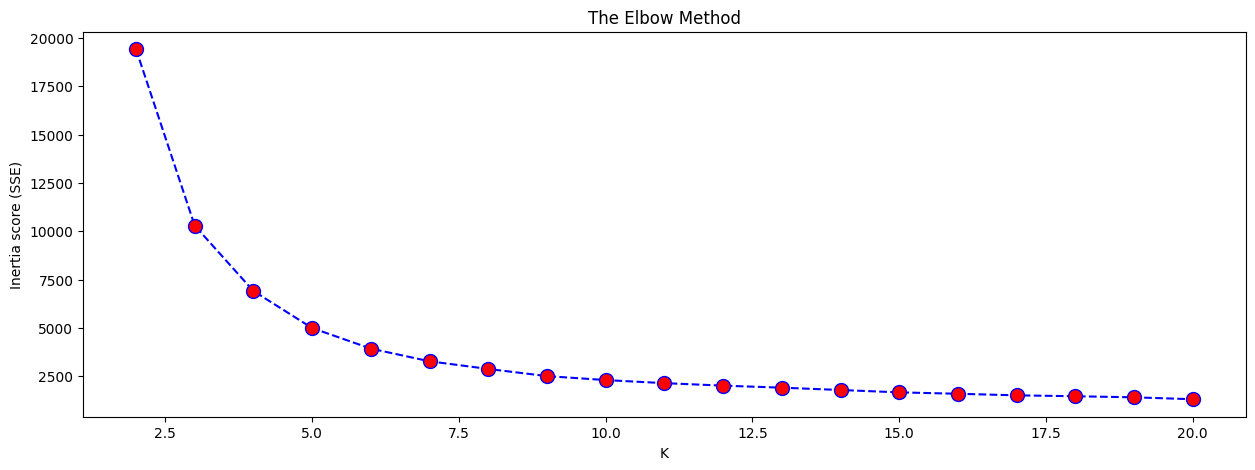

In [5]:
# Iterating through the data to generate clusters 
k1 = []
inertia_s1 = []

for i in tqdm(range(2,21)):
    k1.append(i)
    kmeans1 = KMeans(n_clusters=i,random_state=125,max_iter=100).fit(df)
    inertia_s1.append(kmeans1.inertia_)

# Plotting the Elbow Method to visualize the optimum number of clusters from data
plt.figure(figsize=(15,5))
plt.plot(k1,inertia_s1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('K')
plt.ylabel('Inertia score (SSE)')

In [6]:
# Appending cluster IDs to the dataset
kmeans = KMeans(n_clusters=5,random_state=125,max_iter=100).fit(df)

df['cluster_ids'] = kmeans.labels_

df.head(n=10)

,Gender,Age,Altered Mental State,Chills,Cough,Dizziness,Fever,Heart Failure,Nausea/Vomiting,Abd Pain,Head Pain,Back Pain,Limb Pain,Chest Pain,Possible Pneumonia,Respiratory Tract Infection,SOB,Unresponsive,Weakness,Wheezing,Other Symptom,Total Complaint Symptoms,Arrival Day of Week,Arrival Working/Non-Working Hrs,cluster_ids
0,1,50.6,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,3,4,2,3
1,1,68.4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,2,2,4
2,2,74.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,6,1,4
3,1,81.2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,5,2,1
4,1,79.2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,3,1,1,4
5,1,82.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,3,7,2,1
6,2,91.6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,6,1,1
7,2,93.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,3,3,2,1
8,1,97.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,1,1
9,2,91.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,4,1,1


In [8]:
# Exporting dataframe to new Excel workbook
df.to_excel(r'file1.xlsx', sheet_name='Main', index=False)